In [1]:
import auxiliary

## Loading the images

In [2]:
# We create a list to store the folder and the filenames and another list to store the arrays corresponding to each image
images_names = auxiliary.load_images("data")
filenames = []
for img in images_names:
    filenames.append(img.split('\\')[-1])
print('Some of the filenames are:', filenames[:5])

Some of the filenames are: ['ISIC_0010389.jpg', 'ISIC_0010491.jpg', 'ISIC_0010985.jpg', 'ISIC_0011404.jpg', 'ISIC_0011405.jpg']


Now, we compute the histogram for each image and save it in a variable

In [3]:
images_histograms = auxiliary.data_base_histogram(images_names)

## Calculation of euclidean distances:

In [4]:
# Now, we calculate the distances between a query image and the rest of the images,
# and save the all the distances in a variable
histogram_distances = auxiliary.compare_histograms(images_histograms[20], images_histograms)

We create a list to store all the distances with its corresponding filenames, and order them from small to large

In [5]:
min_list = sorted(zip(filenames,histogram_distances), key=lambda t: t[1])
#print the 6 first images with the smallest distances, being the first the same image, so its distance is 0
print(min_list[0:5])

[('ISIC_0011482.jpg', 0.0), ('ISIC_0011485.jpg', 0.0447094893580697), ('ISIC_0011489.jpg', 0.0521780109879748), ('ISIC_0011484.jpg', 0.05535006915416375), ('ISIC_0011459.jpg', 0.056049053540002364)]


##### Now, let's display the images

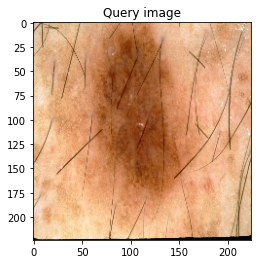

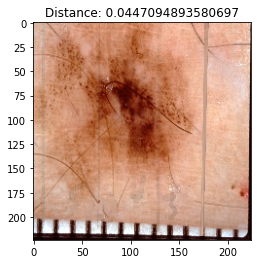

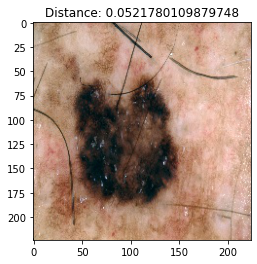

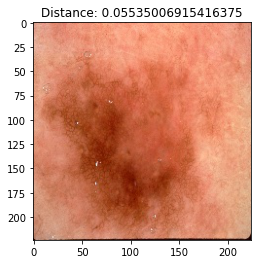

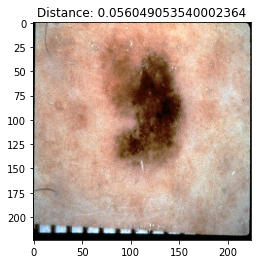

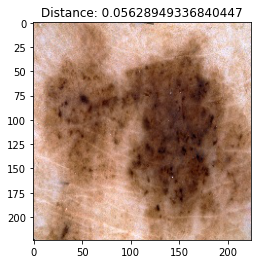

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(len(min_list[0:6])):
    img_query = mpimg.imread('data/'+ min_list[i][0])

    imgplot = plt.imshow(img_query)
    if i == 0:
        plt.title('Query image')
    else:
        plt.title('Distance: ' + str(min_list[i][1]))
    plt.show()

# GABOR filter

First, we generate the necessary kernels to compute the gabor filter.
By default, the parameters are set to:
* n_theta = 4
* sigmas = (1,3)
* frequencies = (0.05, 0.25)

In [7]:
gabor_kernels = auxiliary.create_kernels()

Now, we compute the feature vector of textures for each image

In [8]:
gabor_feats = auxiliary.compute_feats(images_names, gabor_kernels)

## Calculation of Canberra distances:

In [9]:
gabor_distances = auxiliary.compare_gabor(gabor_feats[20], gabor_feats)

In [10]:
min_list_gabor = sorted(zip(filenames,gabor_distances), key=lambda t: t[1])
#print the 6 first images with the smallest distances, being the first the same image, so its distance is 0
print(min_list_gabor[0:5])

[('ISIC_0011482.jpg', array([0.])), ('ISIC_0011485.jpg', array([0.13076449])), ('ISIC_0011496.jpg', array([0.18065748])), ('ISIC_0011481.jpg', array([0.19780137])), ('ISIC_0011488.jpg', array([0.2094787]))]


##### Now, let's display the images

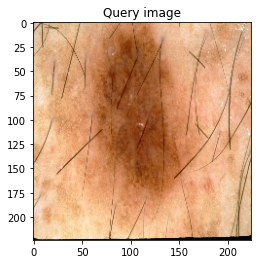

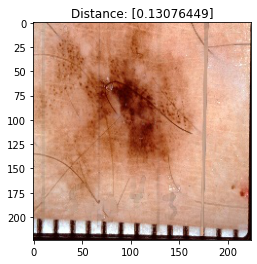

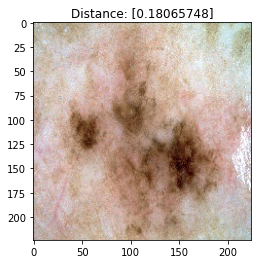

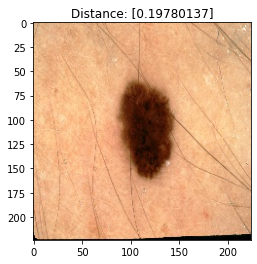

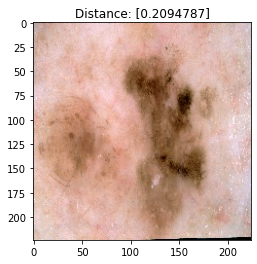

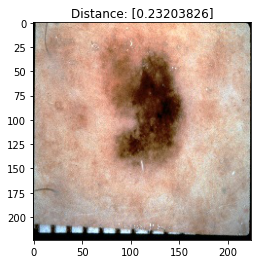

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(len(min_list_gabor[0:6])):
    img_query = mpimg.imread('data/'+ min_list_gabor[i][0])

    imgplot = plt.imshow(img_query)
    if i == 0:
        plt.title('Query image')
    else:
        plt.title('Distance: ' + str(min_list_gabor[i][1]))
    plt.show()

# Combining distances

Now, we use first the Gabor filter for textures to select the 10 most similar images and them apply the color histogram
to rank these 10 images.

In [12]:
similar_images_gabor = auxiliary.sort_distances(gabor_distances, images_names)
ranked_images_names, _ = zip(*similar_images_gabor)

In [13]:
ranked_images_histograms = auxiliary.data_base_histogram(ranked_images_names[:6])
histogram_distances_ranked = auxiliary.compare_histograms(ranked_images_histograms[0], ranked_images_histograms)
similar_images_hist_gabor = auxiliary.sort_distances(histogram_distances_ranked, ranked_images_names[:10])

##### Now, let's display the images

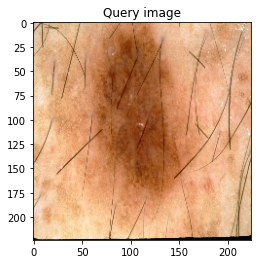

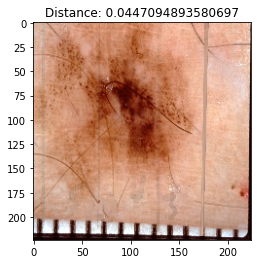

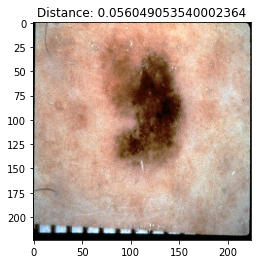

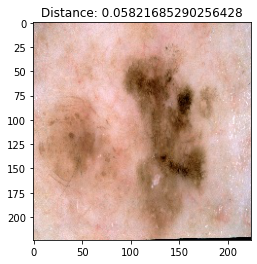

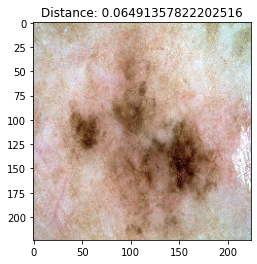

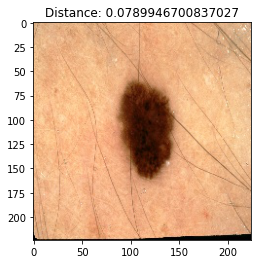

In [14]:
for i in range(len(similar_images_hist_gabor[0:6])):
    img = mpimg.imread(similar_images_hist_gabor[i][0])
    plt.imshow(img)
    if i == 0:
        plt.title('Query image')
    else:
        plt.title('Distance: ' + str(similar_images_hist_gabor[i][1]))
    plt.show()